In [1]:
import pandas as pd
import numpy as np

# cluster library
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Israel Dataset All Encoded.csv')
data.tail()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other,corona_result
101477,1,1,0,0,0,1,1,0,1,0,0,0
101478,1,1,1,0,1,0,1,0,1,0,0,0
101479,1,0,0,0,0,0,1,0,1,0,0,0
101480,1,0,0,0,0,0,0,1,0,0,1,0
101481,1,0,0,0,0,0,0,1,0,0,1,0


In [3]:
data.drop(columns = ['corona_result'], inplace = True)
data.tail()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other
101477,1,1,0,0,0,1,1,0,1,0,0
101478,1,1,1,0,1,0,1,0,1,0,0
101479,1,0,0,0,0,0,1,0,1,0,0
101480,1,0,0,0,0,0,0,1,0,0,1
101481,1,0,0,0,0,0,0,1,0,0,1


Text(0, 0.5, 'Inertia')

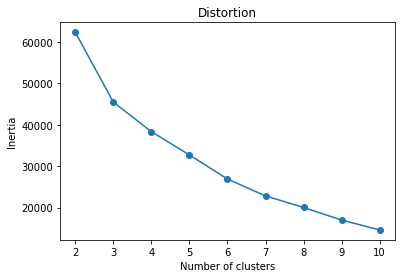

In [4]:
# Kmeans： finding k with inertia

distortions = []
for i in range(2, 11):
    kmeans_fit = KMeans(n_clusters = i, random_state = 5).fit(data)
    distortions.append(kmeans_fit.inertia_)
plt.plot(range(2, 11), distortions, marker = 'o')
# plt.title('Inertia')
plt.xlabel('Number of clusters')
plt.title('Distortion')
plt.ylabel('Inertia')

Text(0.5, 1.0, 'Silhouette score')

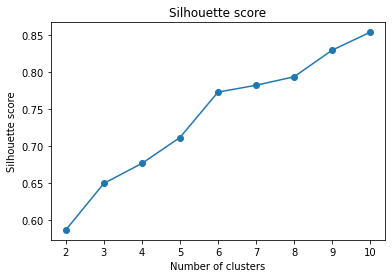

In [5]:
# Kmeans： finding k with silhouette score

silhouette_avg = []
for i in range(2, 11):
    kmeans_fit = KMeans(n_clusters = i, random_state = 5).fit(data)
    silhouette_avg.append(silhouette_score(data, kmeans_fit.labels_))
plt.plot(range(2, 11), silhouette_avg, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score')

# 沒有移除 label

In [6]:
data1 = pd.read_csv('Israel Dataset All Encoded.csv')
data1.tail()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other,corona_result
101477,1,1,0,0,0,1,1,0,1,0,0,0
101478,1,1,1,0,1,0,1,0,1,0,0,0
101479,1,0,0,0,0,0,1,0,1,0,0,0
101480,1,0,0,0,0,0,0,1,0,0,1,0
101481,1,0,0,0,0,0,0,1,0,0,1,0


Text(0, 0.5, 'Inertia')

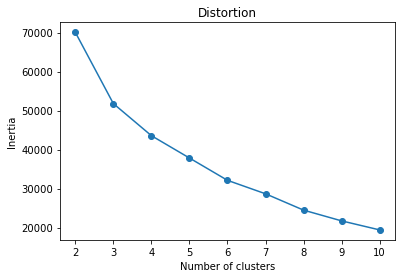

In [9]:
# Kmeans： finding k with inertia

distortions = []
for i in range(2, 11):
    kmeans_fit = KMeans(n_clusters = i, random_state = 5).fit(data1)
    distortions.append(kmeans_fit.inertia_)
plt.plot(range(2, 11), distortions, marker = 'o')
# plt.title('Inertia')
plt.xlabel('Number of clusters')
plt.title('Distortion')
plt.ylabel('Inertia')

Text(0.5, 1.0, 'Silhouette score')

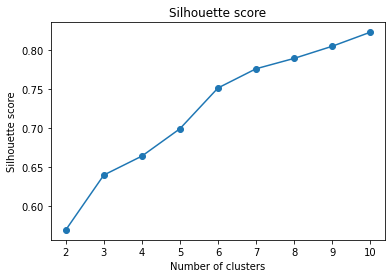

In [10]:
# Kmeans： finding k with silhouette score

silhouette_avg = []
for i in range(2, 11):
    kmeans_fit = KMeans(n_clusters = i, random_state = 5).fit(data1)
    silhouette_avg.append(silhouette_score(data1, kmeans_fit.labels_))
plt.plot(range(2, 11), silhouette_avg, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score')

In [11]:
# Hierarchical clustering

silhouette_avg = []
for i in range(2, 11):
    hierarchy_fit = AgglomerativeClustering(n_clusters = i).fit(data1)
    silhouette_avg.append(silhouette_score(data1, hierarchy_fit.labels_))
plt.plot(range(2, 11), silhouette_avg, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score')

MemoryError: Unable to allocate 38.4 GiB for an array with shape (5149247421,) and data type float64

Text(0.5, 1.0, 'Silhouette score')

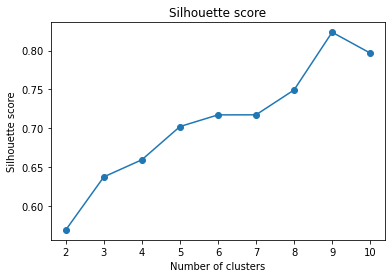

In [12]:
from sklearn.mixture import GaussianMixture

silhouette_avg = []
for i in range(2, 11):
    gmm_fit = GaussianMixture(n_components = i).fit(data1)
    silhouette_avg.append(silhouette_score(data1, gmm_fit.predict(data1)))
plt.plot(range(2, 11), silhouette_avg, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score')